In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('housing.csv')

print("\nHead:\n")
print(df.head())

print("\nInformation:\n")
df.info()

print("\Description:\n")
print(df.describe())

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-795202113.py:15: SyntaxWarning: invalid escape sequence '\D'
  print("\Description:\n")



Head:

              date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/2014 0:00   313000.0         3       1.50       1340.0       NaN   
1  02/05/2014 0:00  2384000.0         5       2.50       3650.0       NaN   
2  02/05/2014 0:00   342000.0         3       2.00       1930.0       NaN   
3  02/05/2014 0:00   420000.0         3       2.25       2000.0       NaN   
4  02/05/2014 0:00   550000.0         4       2.50       1940.0       NaN   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0    1955.0   
1     2.0           0     4          5        3370            280    1921.0   
2     1.0           0     0          4        1930              0    1966.0   
3     1.0           0     0          4        1000           1000    1963.0   
4     1.0           0     0          4        1140            800    1976.0   

   yr_renovated                    street       city  

In [2]:
df = df[df['price'] > 0].copy()

median_sqft_living = df['sqft_living'].median()
median_sqft_lot = df['sqft_lot'].median()
median_yr_built = df['yr_built'].median()

df['sqft_living'] = df['sqft_living'].fillna(median_sqft_living)
df['sqft_lot'] = df['sqft_lot'].fillna(median_sqft_lot)
df['yr_built'] = df['yr_built'].fillna(median_yr_built)

df = df.drop(['street', 'city', 'country'], axis=1)

print("Data cleaning complete.")
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

Data cleaning complete.

Missing Values After Cleaning:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

df['house_age'] = df['year_sold'] - df['yr_built']

df['price_log'] = np.log1p(df['price'])

df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)

df = df.drop(['date', 'yr_built', 'yr_renovated'], axis=1)

print("Head After Feature Engineering:")
print(df.head())

Head After Feature Engineering:
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3       1.50       1340.0    7680.0     1.5           0   
1  2384000.0         5       2.50       3650.0    7680.0     2.0           0   
2   342000.0         3       2.00       1930.0    7680.0     1.0           0   
3   420000.0         3       2.25       2000.0    7680.0     1.0           0   
4   550000.0         4       2.50       1940.0    7680.0     1.0           0   

   view  condition  sqft_above  sqft_basement  statezip  year_sold  \
0     0          3        1340              0  WA 98133       2014   
1     4          5        3370            280  WA 98119       2014   
2     0          4        1930              0  WA 98042       2014   
3     0          4        1000           1000  WA 98008       2014   
4     0          4        1140            800  WA 98052       2014   

   month_sold  house_age  price_log  is_renovated  
0           5 

Displaying price distribution plots...


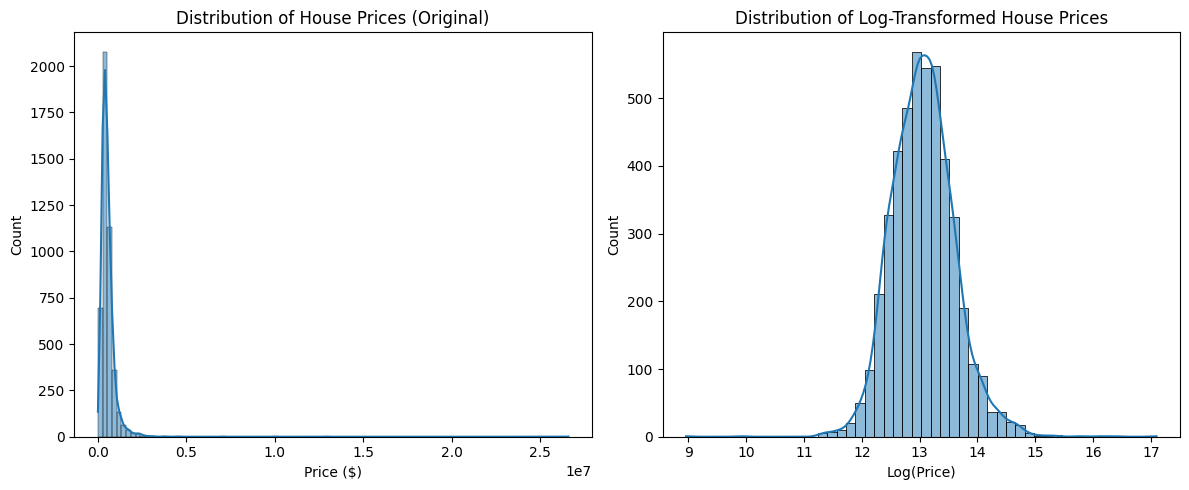

Displaying correlation heatmap...


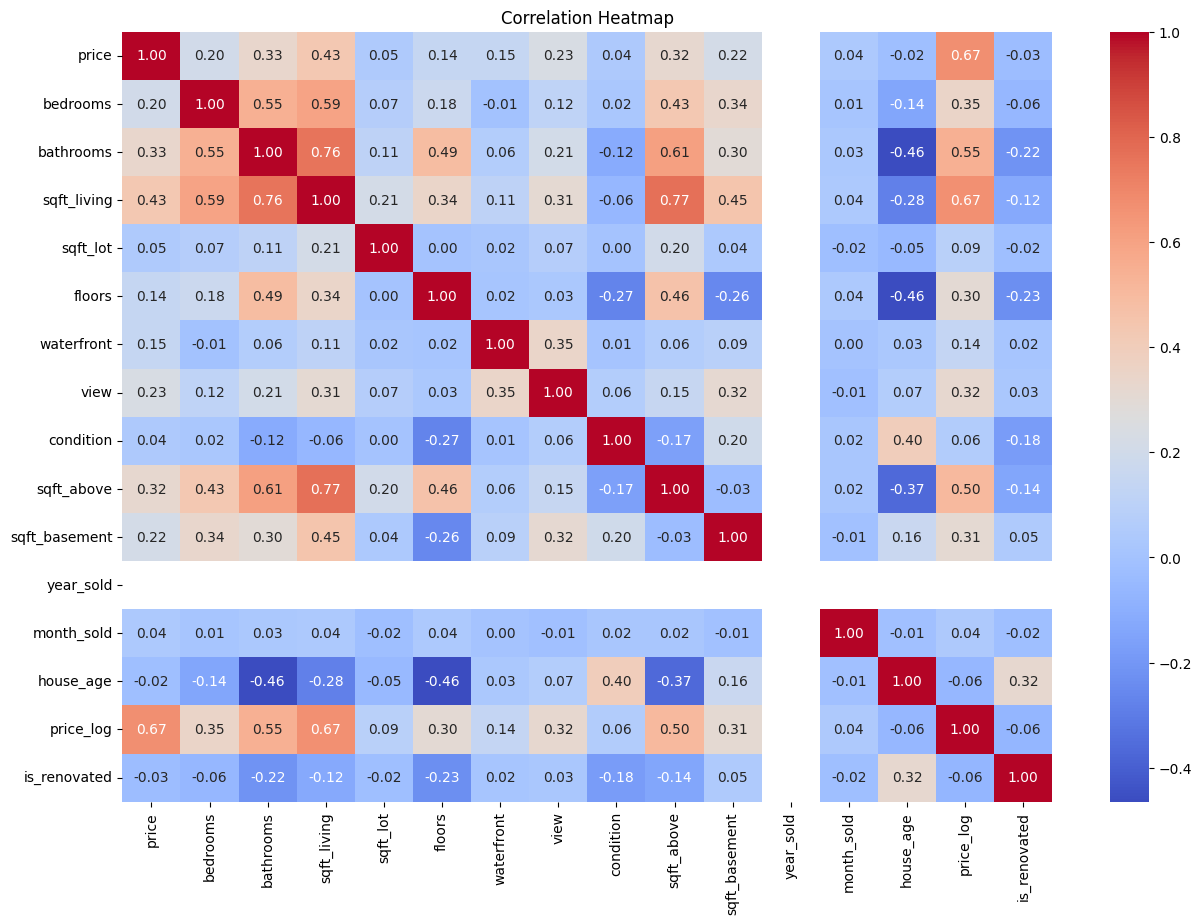

Displaying sqft_living vs. price plot...


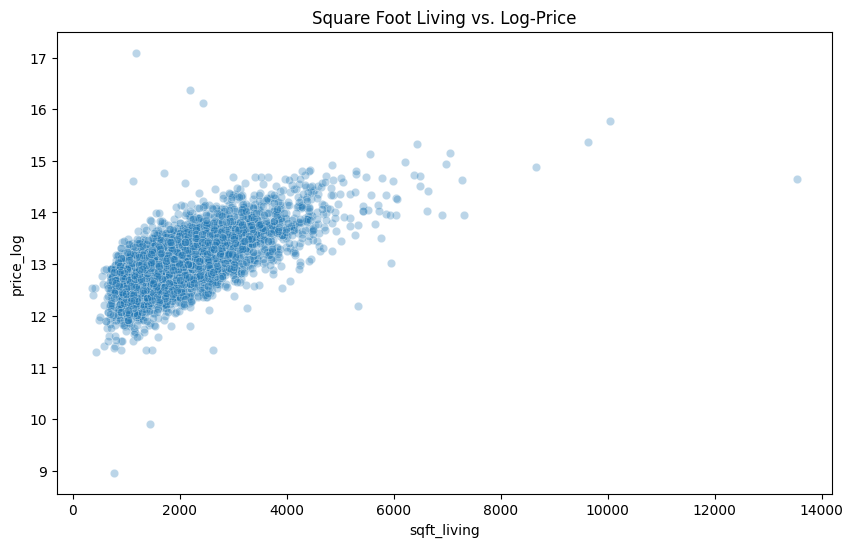

In [4]:
print("Displaying price distribution plots...")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of House Prices (Original)')
plt.xlabel('Price ($)')

plt.subplot(1, 2, 2)
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log(Price)')
plt.tight_layout()
plt.show()


print("Displaying correlation heatmap...")
plt.figure(figsize=(15, 10))
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


print("Displaying sqft_living vs. price plot...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price_log', data=df, alpha=0.3)
plt.title('Square Foot Living vs. Log-Price')
plt.show()

In [5]:
print("Starting manual preprocessing...")
df_encoded = pd.get_dummies(df, columns=['statezip'], drop_first=True)

print("Data after One-Hot Encoding:")
print(df_encoded.head())

y = df_encoded['price_log']

X = df_encoded.drop(['price', 'price_log'], axis=1)

scaler = StandardScaler()

feature_columns = X.columns

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns=feature_columns, index=X.index)

print("\nScaled Features Head:")
print(X_scaled.head())

Starting manual preprocessing...
Data after One-Hot Encoding:
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3       1.50       1340.0    7680.0     1.5           0   
1  2384000.0         5       2.50       3650.0    7680.0     2.0           0   
2   342000.0         3       2.00       1930.0    7680.0     1.0           0   
3   420000.0         3       2.25       2000.0    7680.0     1.0           0   
4   550000.0         4       2.50       1940.0    7680.0     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98155  statezip_WA 98166  \
0     0          3        1340  ...              False              False   
1     4          5        3370  ...              False              False   
2     0          4        1930  ...              False              False   
3     0          4        1000  ...              False              False   
4     0          4        1140  ...              False              Fals